___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [41]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                    centers=4, 
                  cluster_std=1.8,# Độ lệch chuẩn giữa các điểm dữ liệu
                  shuffle= True,# có trộn các điểm dữ liệu lại với nhau không 
                  random_state=101)

In [45]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [51]:
X = data[0]
type(data[0])
X

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

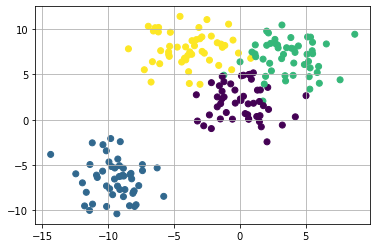

In [53]:
plt.scatter(X[:,0],X[:,1],c=data[1])
plt.grid()

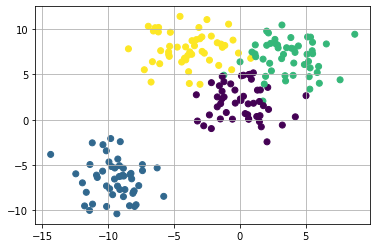

In [54]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.grid()

In [55]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

## Visualize Data

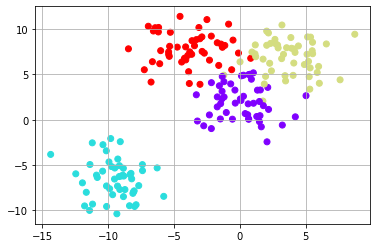

In [56]:
plt.scatter(X[:,0],X[:,1],c=data[1],cmap='rainbow')
plt.grid()

## Creating the Clusters

In [8]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=4,
                init='random', # vị trí center của sluster default
                n_init= 10, # số lần chọn center của slusters default, sẽ chọn ra model có SEE nhỏ nhất
                max_iter= 300,# số lần chạy kmeans tối đa 
                tol= 1e-04 # khi tiến hành hội tụ các điểm, sai số cho phép là bao nhiêu
               )

In [29]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851]])

In [31]:
kmeans.labels_

array([3, 0, 1, 0, 0, 2, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 0, 1, 2, 3, 2, 1,
       1, 2, 3, 2, 2, 1, 0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 0, 3, 1, 2, 1, 1, 3, 0, 1, 2, 3, 1, 1, 3, 0, 2, 0, 2, 3, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 3, 1, 1, 2, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 3, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 3,
       1, 2, 2, 3, 0, 3, 0, 1, 2, 0, 2, 3, 3, 0, 1, 2, 3, 3, 3, 3, 1, 0,
       1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 2, 3, 1, 0, 3, 1, 0, 1, 3, 0, 1, 3,
       0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 0, 0, 3, 2, 1, 0, 0,
       2, 1])

In [34]:
y_km = kmeans.predict(data[0])

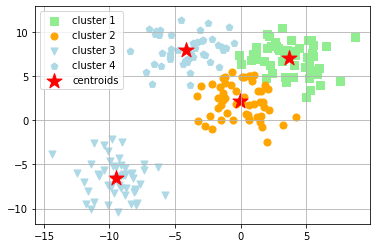

In [63]:
plt.scatter(X[y_km==0,0],         # hiển thị y_km（cluster）=0
                    X[y_km==0,1], 
                    s=50,
                    c='lightgreen',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[y_km==1,0], # hiển thị y_km（cluster）=1
                    X[y_km==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[y_km==2,0],# hiển thị y_km（cluster）=2
                   X[y_km==2,1],
                    s=50,
                    c='lightblue',
                    marker='v',
                    label='cluster 3')
plt.scatter(X[y_km==3,0],# hiển thị y_km（cluster）=3
                   X[y_km==3,1],
                    s=50,
                    c='lightblue',
                    marker='p',
                    label='cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],   # km.cluster_centers_ điểm trung tâm
                    kmeans.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()

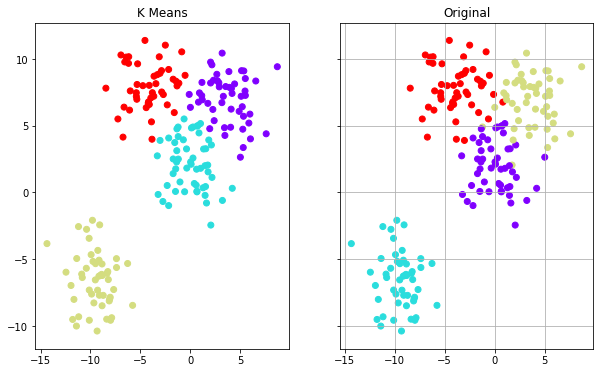

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.grid()

You should note, the colors are meaningless in reference between the two plots.

## Có 1 lưu ý nhỏ là một model k-means được đánh giá là tốt khi giá trị SSE là nhỏ nhất. 
## Với model trên ta có thể lấy giá trị SSE bằng cách sau

In [15]:
kmeans.inertia_

1318.4035725547487

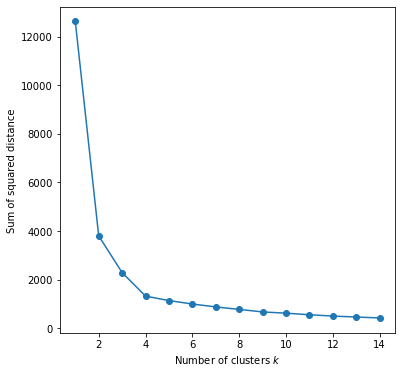

In [64]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data[0])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data[1],kmeans.labels_))
print(classification_report(data[1],kmeans.labels_))

[[ 1 49  0  0]
 [ 0  0 50  0]
 [47  3  0  0]
 [ 2  2  0 46]]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           3       1.00      0.92      0.96        50

    accuracy                           0.23       200
   macro avg       0.26      0.24      0.24       200
weighted avg       0.26      0.23      0.24       200



# Great Job!